<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 1 (теоретическая)

## Задание 1 (**1.5 балла**)

В случае одномерной Ridge-регрессии минимизируется функция со штрафом:
$$Q(w) = (y-xw)^T(y-xw)+\lambda w^2,$$
где $\lambda$ - положительный параметр, штрафующий функцию за слишком большие значения $w$.

1)  (**0.5 балла**) Найдите производную $\nabla_w Q(w)$, выведите формулу для оптимального $w$.

2) (**0.5 балла**) Найдите вторую производную $\nabla^2_w Q(w)$. Убедитесь, что мы оказались в точке минимума.

3) (**0.5 балла**) Выпишите шаг градиентного спуска в матричном виде.

`Ваш ответ здесь`



## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [195]:
import pandas as pd
import numpy as np
# Функция и её производная
def f(x):
    return x * np.sin(5*x) + 0.1*x**2

def df_x(x):
    return 5 * x * np.cos(5*x) + np.sin(5*x) + 0.2 * x

# Градиентный спуск
def gradient_descent(df, x0, eta, max_iter=1000, tol=1e-6):
    x = x0

    path = []
    path.append(x)

    for i in range(max_iter):
        x_new = x - eta * df(x)
        path.append(x)
        
        if abs(x_new - x) < tol:
            return x, path

        x = x_new        
    return x, path

# Поиск экстремумов
def find_points(df, x0, eta, max_iter=1000, tol=1e-6):

    x_min, path_min = gradient_descent(df, x0, eta)

    x_max, path_max = gradient_descent(lambda x: - df(x), x0, eta)

    return x_min, path_min, x_max, path_max


In [234]:
initial_points = [0,0.0001, 0.5, 1]
eta = 0.001

results = []
for x0 in initial_points:
    x_min, path_min, x_max, path_max = find_points(df_x, x0, eta)
    results.append({
        'x0': x0,
        'x_min': x_min,
        'x_max': x_max,
        'path_min': path_min,
        'path_max': path_max
    })

df_results = pd.DataFrame([
    {
        'start_point': res['x0'],
        'min': res['x_min'],
        'max': res['x_max'],
        'iterations_min': len(res['path_min']),
        'iterations_max': len(res['path_max'])
    }
    for res in results
])

In [236]:
df_results

,start_point,min,max,iterations_min,iterations_max
0,0.0000,0.000000,0.000000,2,2
1,0.0001,0.000098,0.396105,4,1001
2,0.5000,0.975061,0.411857,447,513
3,1.0000,0.975138,1.603529,248,337


- Экстремумы (точки указаны в таблице выше) для каждой начальной точки получились разными. Вероятно так получилось из-за нелинейности функции и наличия у нее множества локальных экстермумов на разных отрезках.
- Экстремумы совпадут при старте из точки 0. Это связано с тем, что при подставлении значения 0  в производную функцию она равняется 0.

In [225]:
df_x(0)

0.0

In [227]:
f(0)

0.0

## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [391]:
def ols_solution(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return  np.linalg.inv(X.T @ X) @ X.T @ y

## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [323]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [243]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1]) 
    
    m = X.shape[0] 

    cost_track = np.zeros((iterations, 1))  

    for i in range(iterations):
        idx = np.random.randint(0, m)
        X_i = X[idx, :].reshape(1, -1)  
        y_i = y[idx]  

        params = params - learning_rate * (2 * X_i.T @ ((X_i @ params) - y_i))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

In [246]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [300]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [279]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params

In [347]:
from time import time
import matplotlib.pyplot as plt

### Обучение линейной регрессии по аналитической формуле

In [393]:
start = time()

params_ols = ols_solution(X, y)

end = time()
print(end - start)

0.035411834716796875


In [395]:
ols_preds = predict(X, params_ols)
r2_ols = r2_score(y, ols_preds)
print(r2_ols)

0.7522787820701916


### Обучение линейной регрессии с помощью GD

In [406]:
start = time()

params_GD = gradient_descent(X, y, 0.01, 10000)

end = time()
print(end - start)

7.917484760284424


In [408]:
gd_preds = predict(X, params_GD[1])
r2_gd = r2_score(y, gd_preds)
print(r2_gd)

0.7554626185750483


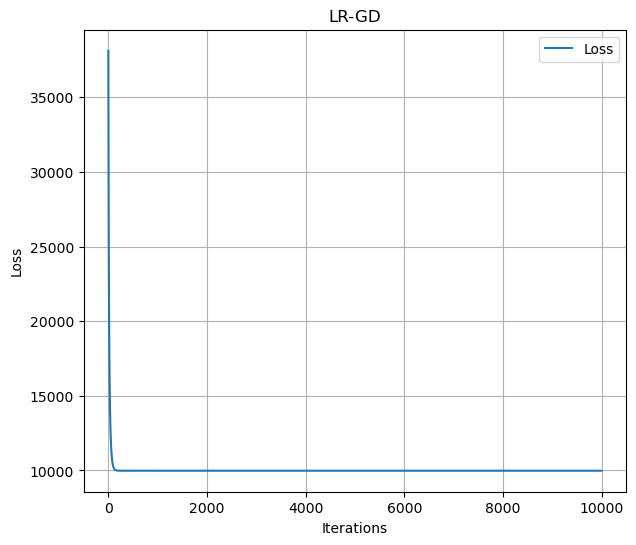

In [410]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(params_GD[0])), params_GD[0], label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("LR-GD")
plt.legend()
plt.grid()
plt.show()

### Обучение линейной регрессии с помощью SGD

In [413]:
start = time()

params_SGD = stochastic_gradient_descent(X, y, 0.01, 10000)

end = time()
print(end - start)

4.471971035003662


In [414]:
sgd_preds = predict(X, params_SGD[1])
r2_sgd = r2_score(y, sgd_preds)
print(r2_sgd)

0.7227301830784985


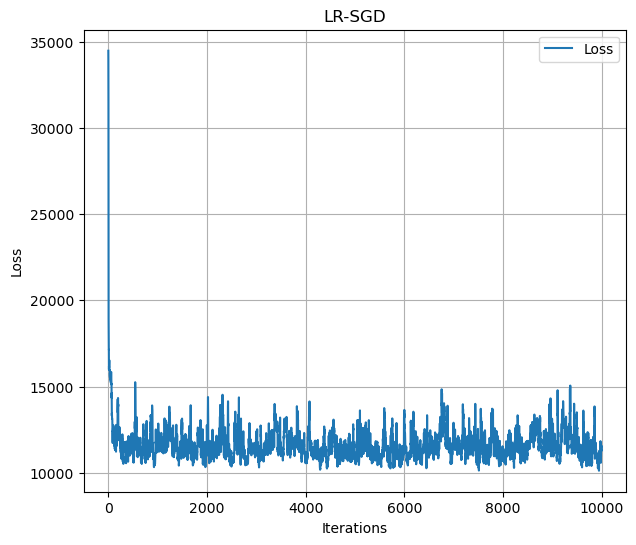

In [415]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(params_SGD[0])), params_SGD[0], label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("LR-SGD")
plt.legend()
plt.grid()
plt.show()

- Судя по метрикам, все методы справились с нахождением минимума
- Наиболее быстрым является метод OLS, а наиболее медленным GD
- Лучший показатель R^2 наблюдался у метода GD. SGD показал себя хуже всех. OLS был чуть хуже, чем GD, но это возможно произошло из-за не иделаьной обратимости матриц.

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

In [374]:
def stochastic_gradient_descent_l_2(X, y, learning_rate, iterations, alpha):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1]) 
    
    m = X.shape[0] 

    cost_track = np.zeros((iterations, 1))  

    for i in range(iterations):
        idx = np.random.randint(0, m)
        X_i = X[idx, :].reshape(1, -1)  
        y_i = y[idx]  

        params = params - learning_rate * (2 * (X_i.T @ ((X_i @ params) - y_i)) + 2 * alpha * params)
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [384]:
start = time()
results = []

for alpha in np.arange(0.01, 1.01, 0.01):
    cost_track, params = stochastic_gradient_descent_l_2(X, y, 0.01, 10000, alpha)
    predictions = predict(X, params)
    r2 = r2_score(y, predictions)
    results.append((alpha, r2))

end = time()
print(end - start)
best_a_r = max(results, key=lambda x: x[1])
print("Лучшее значение alpha:", best_a_r[0])
print("Максимальный R^2:", best_a_r[1])

351.8192801475525
Лучшее значение alpha: 0.05
Максимальный R^2: 0.7431896666261308


Мне было интересно можно ли добиться лучших результатов при большем диапазоне перебора параметров. Как оказалось можно. При обычном переборе лучшим коэффициентом регуляризации оказался 0.1 с R^2 равным 0.7424. При более широком подборе коэффициента лучшим окзался коэффициент 0.05 с R^2 равным 0.7431.

In [381]:
results

[(0.1, 0.7424368186999424),
 (0.2, 0.7167011944603888),
 (0.30000000000000004, 0.7377533294902258),
 (0.4, 0.6635301886832805),
 (0.5, 0.683008326973165),
 (0.6000000000000001, 0.6214120185492393),
 (0.7000000000000001, 0.6749058788282238),
 (0.8, 0.680728984046522),
 (0.9, 0.6036940757177472),
 (1.0, 0.6182759745650668)]

In [386]:
results

[(0.01, 0.7231217278978066),
 (0.02, 0.7271091833363573),
 (0.03, 0.7381200417262772),
 (0.04, 0.7151218673396493),
 (0.05, 0.7431896666261308),
 (0.06, 0.7366223944609291),
 (0.07, 0.733175027527567),
 (0.08, 0.7211918100388215),
 (0.09, 0.6923544798309677),
 (0.1, 0.7033761753217412),
 (0.11, 0.7385115382250702),
 (0.12, 0.7371227524040409),
 (0.13, 0.7144486827860672),
 (0.14, 0.7198538953534352),
 (0.15, 0.7282687447706728),
 (0.16, 0.7007189938667999),
 (0.17, 0.7113909851915077),
 (0.18, 0.7349780171621492),
 (0.19, 0.7112753174216186),
 (0.2, 0.7223504483330949),
 (0.21, 0.6850470368177651),
 (0.22, 0.7404352271082926),
 (0.23, 0.6876181074375446),
 (0.24, 0.7208709220550324),
 (0.25, 0.7161758244144267),
 (0.26, 0.7366016878620286),
 (0.27, 0.7302977219309561),
 (0.28, 0.7365888605302857),
 (0.29, 0.6880185360693967),
 (0.3, 0.7111976871031448),
 (0.31, 0.7226934799549358),
 (0.32, 0.6745531562074358),
 (0.33, 0.7019821048344799),
 (0.34, 0.6761826533282016),
 (0.35000000000000

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [419]:
def adagrad(X, y, learning_rate, iterations, epsilon=1e-8):
    
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])  
    m = X.shape[0]  
    
    cost_track = np.zeros((iterations, 1))  
    G = np.zeros_like(params)  

    for i in range(iterations):
        grad = (2 / m) * (X.T @ (X @ params - y))
        G += grad**2
        adjusted_lr = learning_rate / (np.sqrt(G) + epsilon)
        
        params -= adjusted_lr * grad        
        cost_track[i] = compute_cost(X, y, params)
    
    return cost_track, params

In [468]:
start = time()
ada_params = adagrad(X, y, 0.01, 10000000)
end = time()
print(end - start)

10318.150506019592


In [469]:
ada_preds = predict(X, ada_params[1])
r2_ada = r2_score(y, ada_preds)
print(r2_ada)

0.7304268103316589


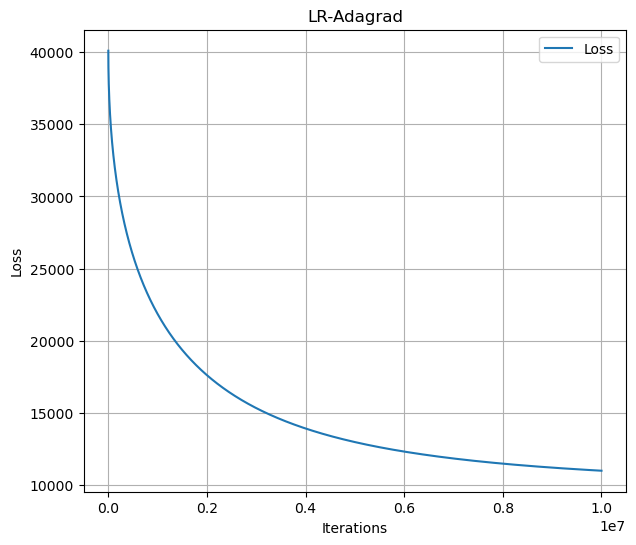

In [470]:
plt.figure(figsize=(7, 6))
plt.plot(range(len(ada_params[0])), ada_params[0], label="Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("LR-Adagrad")
plt.legend()
plt.grid()
plt.show()

Пытался получить максимальный результат этим методом, но что-то пошло не так... 

##### (Update)
В целом при параметре `learning_rate = 0.01` и 10000000 удалось прийти к метрике R^2, которая лучше, чем у SGD.

In [507]:
start = time()
ada_params = adagrad(X, y, 0.5, 10000)
end = time()
print(end - start)

12.451739072799683


In [508]:
ada_preds = predict(X, ada_params[1])
r2_ada = r2_score(y, ada_preds)
print(r2_ada)

0.7526848404454867


Как оказалось можно бьло получить еще более лучше результаты просто использовав параметр `learning_rate = 0.5` и задействовав меньше итераций.

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

Вероятно, хоть метод Ньютона и точнее, но с точки зреня вычислений он сильно более затратный в плане вычислительных ресурсов. Например, матрица Гессе, которая требуется для методов второго порядка сильно более объемна, чем градиент. Уже это говорит о том, что потребутся сильно больше памяти для использования методов второго порядка. Особенно в случаях, когда у какой-нибудь модели сотни тысяч параметров.

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/qxjz2tp)

Мне кажется это кот Сабрины 